# Imoprting library

In [275]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import r2_score 
from sklearn.metrics import classification_report

In [276]:
df = pd.read_csv("Iris.csv")
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [278]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


# Data Visulization

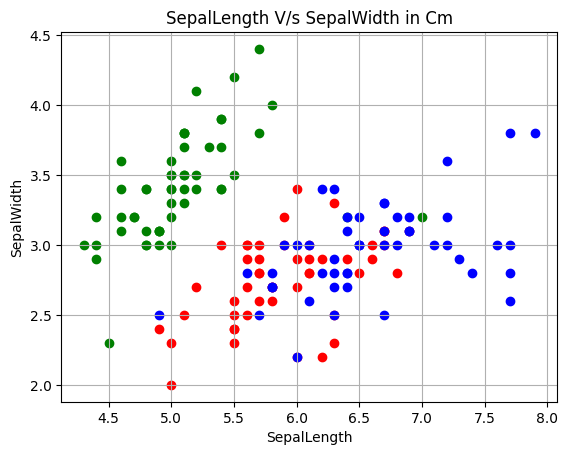

In [279]:
plt.scatter(df.iloc[:52,1:2] ,df.iloc[:52,2:3] , color='green' , label='setosa')
plt.scatter(df.iloc[52:100,1:2],df.iloc[52:100,2:3] , color= 'red' ,label='versicolor')
plt.scatter(df.iloc[101:,1:2],df.iloc[101:,2:3] , color= 'blue' ,label='virginica')
plt.title('SepalLength V/s SepalWidth in Cm')
plt.xlabel('SepalLength')
plt.ylabel('SepalWidth')
plt.grid()

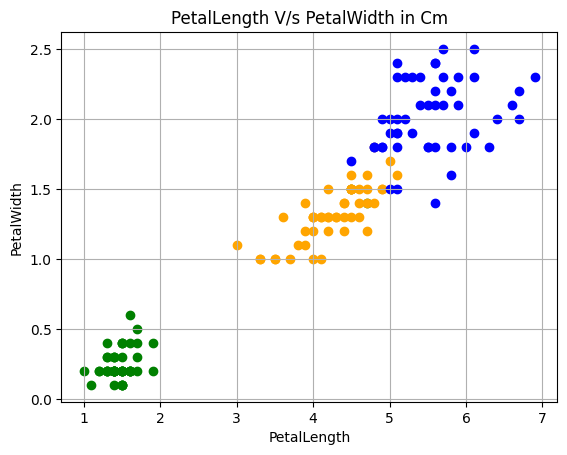

In [280]:
plt.scatter(df.iloc[:52,3:4] ,df.iloc[:52,4:5] , color='green' , label='setosa')
plt.scatter(df.iloc[52:100,3:4],df.iloc[52:100,4:5] , color= 'orange' ,label='versicolor')
plt.scatter(df.iloc[101:,3:4],df.iloc[101:,4:5] , color= 'blue' ,label='virginica')
plt.title('PetalLength V/s PetalWidth in Cm')
plt.xlabel('PetalLength')
plt.ylabel('PetalWidth')
plt.grid()

In [281]:
x = df.drop(['Id','Species'],axis=1)
y = df.iloc[:,5:].replace(['Iris-setosa','Iris-versicolor','Iris-virginica'] , [0 , 1 , 2])
Decode = {'Iris-setosa':0,'Iris-versicolor':1,'Iris-virginica':2 }
x_train , x_test , y_train , y_test = train_test_split(x.to_numpy(),y.to_numpy().ravel(),test_size=0.2,random_state=42)
y_train[0:10]

array([0, 0, 1, 0, 0, 2, 1, 0, 0, 0])

In [282]:
x_train[0:10]

array([[4.6, 3.6, 1. , 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [6.7, 3.1, 4.4, 1.4],
       [4.8, 3.4, 1.6, 0.2],
       [4.4, 3.2, 1.3, 0.2],
       [6.3, 2.5, 5. , 1.9],
       [6.4, 3.2, 4.5, 1.5],
       [5.2, 3.5, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.2, 4.1, 1.5, 0.1]])

# Training Model

In [283]:
KNN = KNeighborsClassifier( n_neighbors = 5)
KNN.fit(x_train,y_train)

KNeighborsClassifier()

# Testing the Model

In [284]:
y_pred = KNN.predict(x_test)
print(x_test[0])
y_pred[0]

[6.1 2.8 4.7 1.2]


1

# Calculating the Score 

In [285]:
print(KNN.score(x_test,y_test))
r2_score(y_test,y_pred)

1.0


1.0

In [286]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [287]:
# KNN = KNeighborsClassifier( n_neighbors = 50)
# KNN.fit(x_train,y_train)
# print(f'Accuracy: {KNN.score(x_test,y_test)}')
# print(f'R2 score: {r2_score(y_test,y_pred)}')
# print(f'Report:{classification_report(y_test,y_pred)}')
'''
Accuracy: 0.9666666666666667
R2 score: 0.9523052464228935
Report:              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.90      1.00      0.95         9
           2       1.00      0.91      0.95        11

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30

'''

'\nAccuracy: 0.9666666666666667\nR2 score: 0.9523052464228935\nReport:              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00        10\n           1       0.90      1.00      0.95         9\n           2       1.00      0.91      0.95        11\n\n    accuracy                           0.97        30\n   macro avg       0.97      0.97      0.97        30\nweighted avg       0.97      0.97      0.97        30\n\n'